In [6]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd

# data visulization
import seaborn as sns
import matplotlib.pyplot as plt

# text processing
import nltk
from nltk.corpus import stopwords

import string
from nltk.stem import PorterStemmer

# regular expression
import re

# model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [7]:
df = pd.read_csv('Downloads/twitter_training.csv')

In [8]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.shape

(74681, 4)

In [10]:
col = ['id', 'entity', 'target', 'text']

In [13]:
df.columns = col

In [14]:
df.head()

,id,entity,target,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74681 non-null  int64 
 1   entity  74681 non-null  object
 2   target  74681 non-null  object
 3   text    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [16]:
df.isnull().sum()

id          0
entity      0
target      0
text      686
dtype: int64

In [17]:
# drop null values
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

id        0
entity    0
target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

2340

In [20]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [24]:
df['target'].value_counts()

target
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

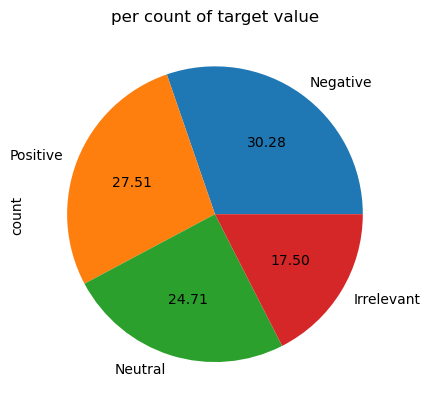

In [25]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("per count of target value")
plt.show()

In [34]:
# char count 
df['char_count'] = df['text'].apply(len)
# word count 
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# sentence count
df['sent_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [36]:
df.head()

,id,entity,target,text,char_count,word_count,sent_count
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,11,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,11,1


In [39]:
# count of each user
df.groupby('id')['target'].count().sort_values(ascending=False).reset_index()

,id,target
0,6422,6
1,7996,6
2,8131,6
3,8132,6
4,8133,6
...,...,...
12442,8707,2
12443,10038,2
12444,1094,2
12445,8808,2


Text(0.5, 1.0, 'sent distribution')

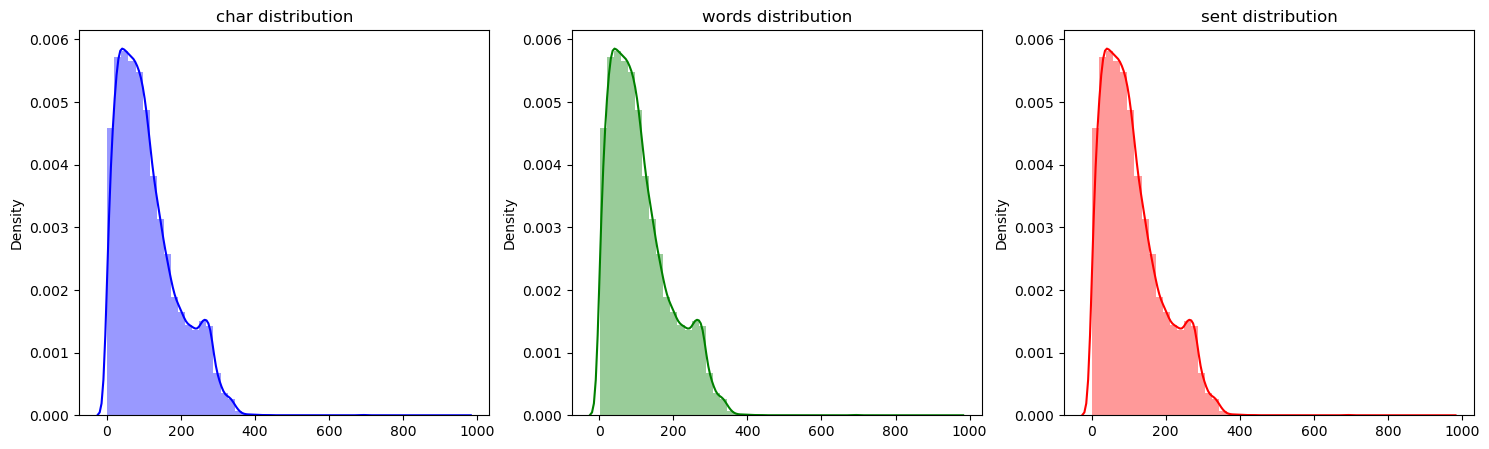

In [43]:
fig, axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(ax=axes[0],x=df['char_count'],color='b')
axes[0].set_title('char distribution')


sns.distplot(ax=axes[1],x=df['char_count'],color='g')
axes[1].set_title('words distribution')


sns.distplot(ax=axes[2],x=df['char_count'],color='r')
axes[2].set_title('sent distribution')

In [45]:
# drop unnecessary cols
df = df.drop(columns=['id','entity'],axis=1)

In [46]:
df.head()

,target,text,char_count,word_count,sent_count
0,Positive,I am coming to the borders and I will kill you...,51,13,1
1,Positive,im getting on borderlands and i will kill you ...,50,11,1
2,Positive,im coming on borderlands and i will murder you...,51,11,1
3,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
4,Positive,im getting into borderlands and i can murder y...,53,11,1


In [48]:
pip install emoji


     ------------------------------------ 431.4/431.4 kB 748.0 kB/s eta 0:00:00


In [50]:
import emoji
# remove emojis from tweets
df['text'] = df['text'].apply(lambda x: emoji.replace_emoji(x,replace=''))

In [51]:
# function for text preprocessing
ps = PorterStemmer()

def preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    full_txt = []
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            full_txt.append(ps.stem(i))
    return ' '.join(full_txt)

In [52]:
df['text'] = df['text'].apply(preprocessing)

In [53]:
df.head()

,target,text,char_count,word_count,sent_count
0,Positive,come border kill,51,13,1
1,Positive,im get borderland kill,50,11,1
2,Positive,im come borderland murder,51,11,1
3,Positive,im get borderland 2 murder,57,13,1
4,Positive,im get borderland murder,53,11,1


In [60]:
# Positive - 1
# Negative - 0
# Neutral - 2
# Irrelevant - 3

df['sentiment'] = df['target'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})

In [61]:
X = df['text']
y = df['sentiment']

In [62]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
# step-1 convert text data into numeric 
# step-2 apply RandomForestClassifier 


sentiment_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rfc',RandomForestClassifier(random_state=42))
])

In [64]:
# fit the data into pipeline
sentiment_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [65]:
y_pred = sentiment_pipeline.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9143116321261601


In [66]:
lr_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lr',LogisticRegression(penalty=None,solver='sag',max_iter=500))
])

In [67]:
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(max_iter=500, penalty=None, solver='sag'))])

In [68]:
lr_pred = lr_pipeline.predict(X_test)
print(accuracy_score(y_test,lr_pred))

0.8210173749214988


In [69]:
mnb_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('mnb',MultinomialNB())
])

In [70]:
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [71]:
mnb_pred = mnb_pipeline.predict(X_test)
print(accuracy_score(y_test,mnb_pred))

0.7148140394948015


Random forest classifier gives more accuracy

In [72]:
import pickle

# Save the pipeline using pickle
with open('rfc_sentiment_model', 'wb') as file:
    pickle.dump(sentiment_pipeline, file)